# Check Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from os import listdir
from os.path import isfile, join

In [2]:
os.environ['IMAGE_FOLDER']
#print(os.environ)

'/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_sample'

In [3]:
image_dir = os.environ['IMAGE_FOLDER']

#image_files = [f for f in listdir(image_dir) if isfile(join(image_dir, f))]

image_files = []
for f in listdir(image_dir):
    print(f)
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

X_list = []
y_list = []
print(image_files)
for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat = image_info[3]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list.append(cat)

X_data = np.array(X_list)
print(X_data.shape)
y_data = np.array(y_list)
print(y_data.shape)

1237664673256571815_206.152742248973_35.7832473187171_GALAXY_1.010923.jpg
1237678597545591138_341.669732121639_2.68301678396564_STAR_1.209123.jpg
1237661971714802594_167.43558751989_7.25414879542971_GALAXY_0.6665187.jpg
1237678661426872832_6.57664509322581_4.68786591849795_STAR_2.225737.jpg
1237680272035807907_331.937003344296_19.1261163729245_STAR_0.0001422011.jpg
1237671257982959869_71.7395540497452_22.8695598593538_STAR_-8.090883E-05.jpg
1237680275799212442_6.26243031097539_26.8156110992586_STAR_2.767038.jpg
1237663782598148618_25.9370141980074_-1.22368504381066_GALAXY_0.2391574.jpg
1237680246816637360_5.46604500701631_20.3671261289832_GALAXY_0.6223869.jpg
1237653652374814984_7.09083700083437_15.2762710357545_GALAXY_0.2505086.jpg
1237680299419763284_338.218180526807_21.2859200058836_GALAXY_0.2219528.jpg
1237679504331899166_31.4402286809799_18.5975965947577_GALAXY_0.1724996.jpg
1237657608571453882_123.403717508815_37.3820781822253_STAR_0.jpg
1237653652373832067_4.66282336206609_15.36

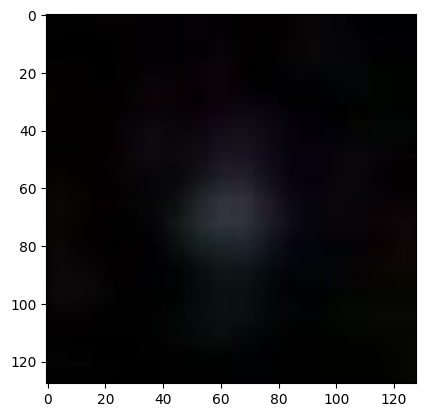

In [4]:
plt.imshow(X_data[3])

In [5]:
#y.value_counts()/len(y)

In [6]:
import pandas as pd
y_data_cat = pd.Series(y_data).map({'STAR':0, 'GALAXY':1})
y_data_cat


0       1
1       0
2       1
3       0
4       0
       ..
4319    0
4320    0
4321    0
4322    1
4323    0
Length: 4324, dtype: int64

In [7]:
import pandas as pd
from tensorflow.keras.utils import to_categorical

#df = pd.read_csv('/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data')
X = X_data
y = y_data_cat

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3459, 128, 128, 3), (865, 128, 128, 3), (3459,), (865,))

# 1. The Convolutional Neural Network (test1)

### A. Architecture and compilation of a CNN

In [9]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/nataliamenacho/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       615,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634,453 (2.42 MB)

 Trainable params: 634,453 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Compile model
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','recall','precision','mae','mse'])


### B. Training the CNN

In [12]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

history_1 = model_1.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])


Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.7926 - loss: 12.5815 - mae: 0.2774 - mse: 0.1958 - precision: 0.8274 - recall: 0.8400 - val_accuracy: 0.9032 - val_loss: 0.5724 - val_mae: 0.1622 - val_mse: 0.0834 - val_precision: 0.9192 - val_recall: 0.9256
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.9092 - loss: 0.3552 - mae: 0.1741 - mse: 0.0858 - precision: 0.9194 - recall: 0.9306 - val_accuracy: 0.9061 - val_loss: 0.3098 - val_mae: 0.1465 - val_mse: 0.0757 - val_precision: 0.9335 - val_recall: 0.9140
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.9272 - loss: 0.2599 - mae: 0.1417 - mse: 0.0648 - precision: 0.9358 - recall: 0.9450 - val_accuracy: 0.9075 - val_loss: 0.3081 - val_mae: 0.1709 - val_mse: 0.0786 - val_precision: 0.9399 - val_recall: 0.9093
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9300 - loss: 0.2317 - mae: 0.1283 - mse: 0.0573 - precision: 0.9367 - recall: 0.9495 - val_accuracy: 0

### C. Evaluate model's performance

In [14]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9001 - loss: 0.3607 - mae: 0.1548 - mse: 0.0861 - precision: 0.8956 - recall: 0.9524


[0.32947027683258057,
 0.9109826683998108,
 0.9644194841384888,
 0.8987783789634705,
 0.1436074823141098,
 0.07666102051734924]

### D. Plot loss and accuracy

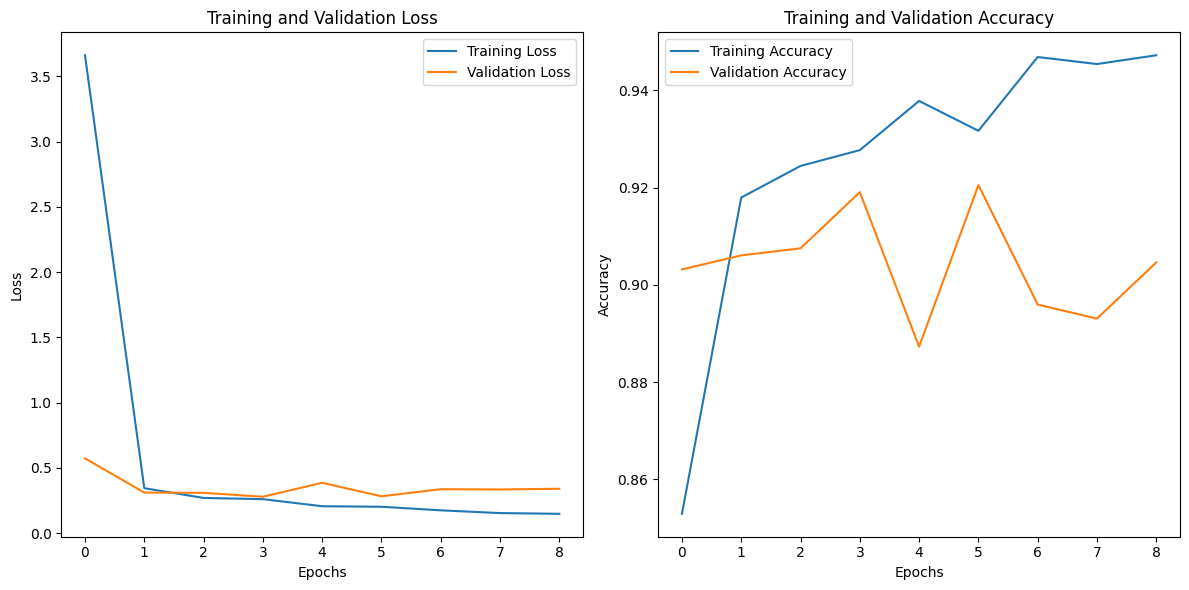

In [15]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 2. The Convolutional Neural Network (other tests)

In [16]:
# Model 2: Increase neurons in the Dense layer
model_2 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')])


# Model 3: Further increase neurons in the Dense layer
model_3 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 4: Increase number of filters in Conv2D layers
model_4 = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 5
model_5 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [17]:
# Compile the models
models = [model_2, model_3, model_4, model_5]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.
Model 3 compiled.
Model 4 compiled.


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")


Training Model 1...
Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.8448 - loss: 8.1126 - mae: 0.1812 - mse: 0.1451 - precision: 0.8744 - recall: 0.8658 - val_accuracy: 0.8468 - val_loss: 0.4673 - val_mae: 0.2413 - val_mse: 0.1261 - val_precision: 0.9355 - val_recall: 0.8093
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9080 - loss: 0.4385 - mae: 0.1853 - mse: 0.0876 - precision: 0.9297 - recall: 0.9203 - val_accuracy: 0.9090 - val_loss: 0.2829 - val_mae: 0.1786 - val_mse: 0.0780 - val_precision: 0.9318 - val_recall: 0.9209
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9347 - loss: 0.2249 - mae: 0.1376 - mse: 0.0591 - precision: 0.9379 - recall: 0.9555 - val_accuracy: 0.9335 - val_loss: 0.2257 - val_mae: 0.1289 - val_mse: 0.0611 - val_precision: 0.9364 - val_recall: 0.9581
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9376 - loss: 0.2212 - mae: 0.1232 - mse: 0.0558 - precision: 0.9345 - recall: 0.966

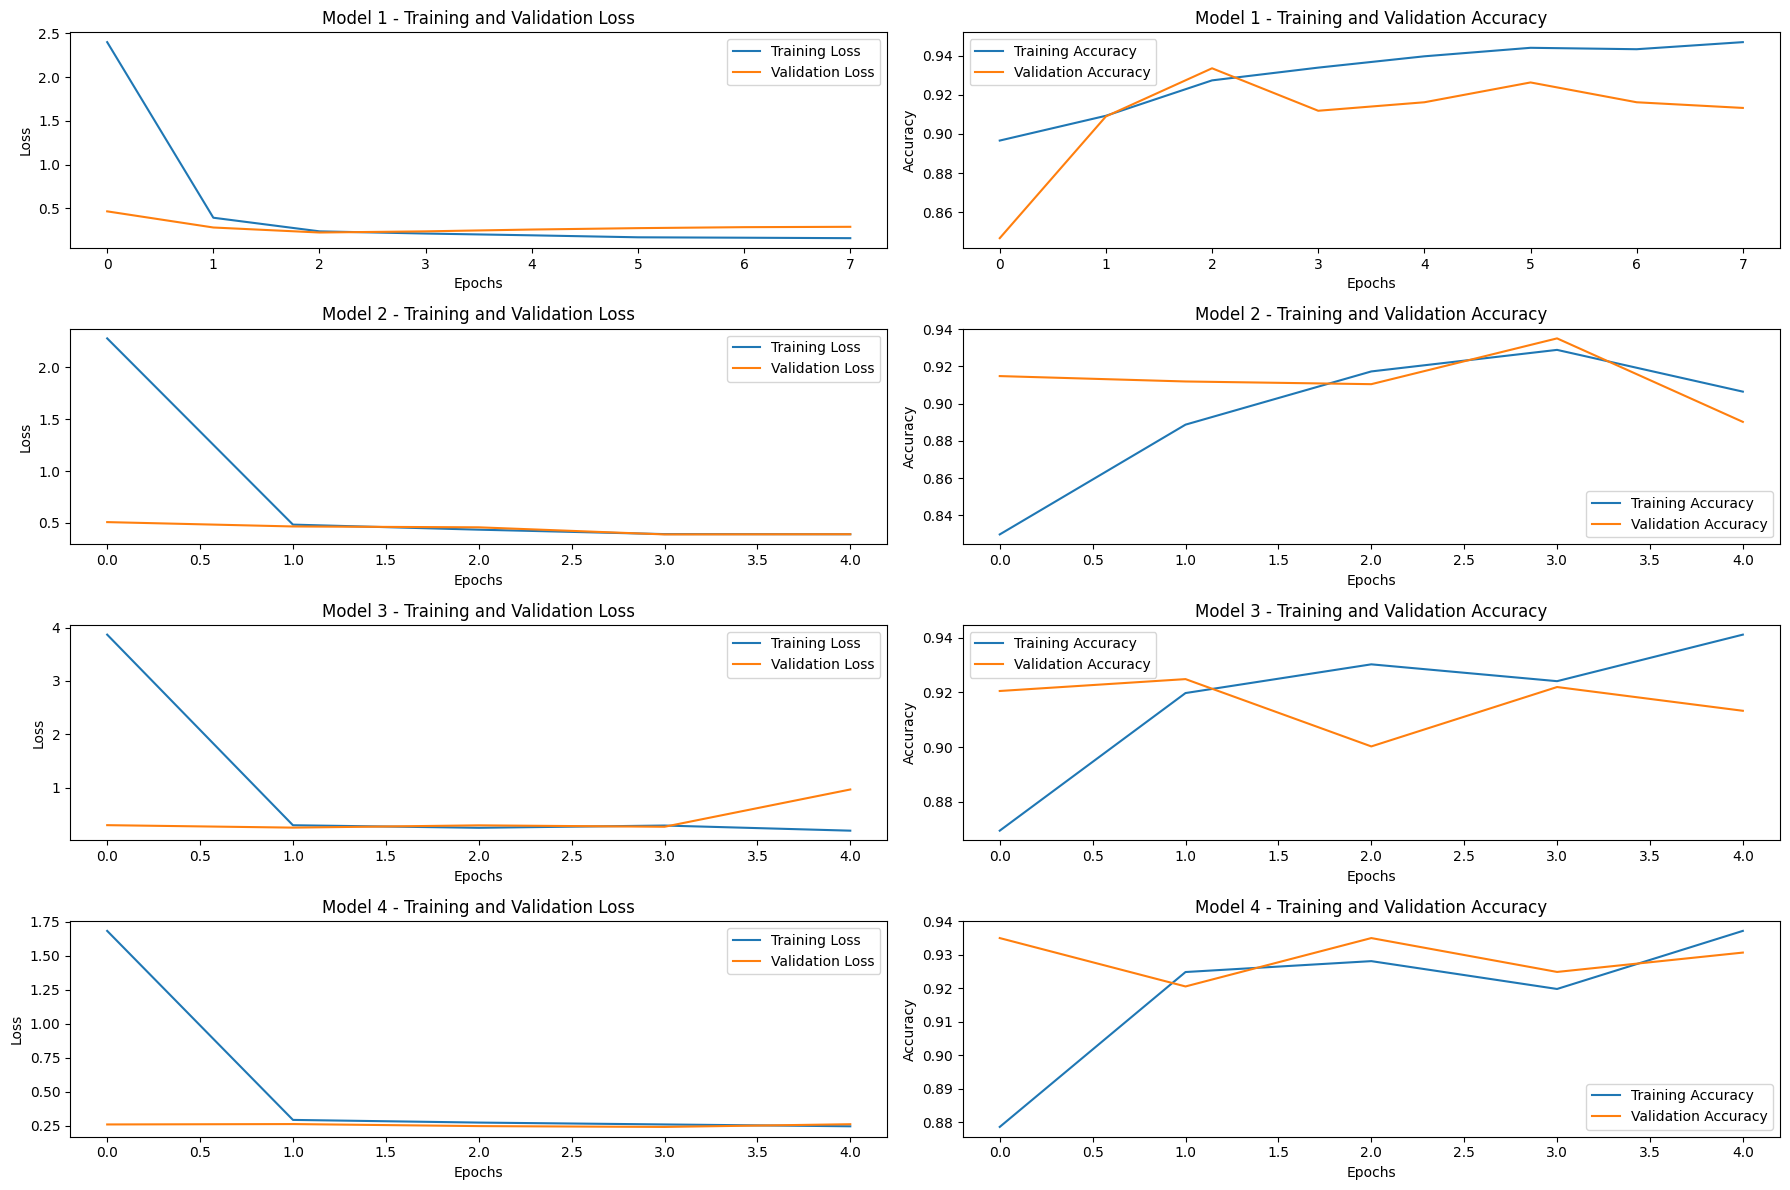

In [19]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [20]:
y_train.value_counts()/len(y_train)

1    0.61752
0    0.38248
Name: count, dtype: float64

## Last model (fingers crossed - final test )

Last try with 2 models (the first one and the model_3) using the augmented images

In [ ]:
image_dir = os.environ['IMAGE_FOLDER']

#image_files = [f for f in listdir(image_dir) if isfile(join(image_dir, f))]

image_files = []
for f in listdir(image_dir):
    print(f)
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

X_list = []
y_list = []
print(image_files)
for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat = image_info[3]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list.append(cat)

X_data = np.array(X_list)
print(X_data.shape)
y_data = np.array(y_list)
print(y_data.shape)

In [ ]:
#Model r2d2: Further increase neurons in the Dense layer
model_r2d2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Model c3po: Further increase neurons in the Dense layer
model_c3po = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the models
models = [model_r2d2, model_c3po]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")

In [ ]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()